In [0]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [0]:
def plt_dynamic(x, vy, ty, ax, colors=['b']):
    ax.plot(x, vy, 'b', label="Validation Loss")
    ax.plot(x, ty, 'r', label="Train Loss")
    plt.legend()
    plt.grid()
    fig.canvas.draw()

#4 conv Layer

In [0]:
#4Conv

In [0]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(3, 3),
                 activation='relu',padding = "same",kernel_initializer='he_normal',
                 input_shape=input_shape))

model.add(Conv2D(32, (2, 2), activation='relu',padding = "same",kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(4, 4)))

model.add(Dropout(0.5))
model.add(Conv2D(128, (5, 5), activation='relu',padding = "same",kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 7s 116us/step - loss: 0.3695 - acc: 0.8841 - val_loss: 0.0659 - val_acc: 0.9800
Epoch 2/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0884 - acc: 0.9717 - val_loss: 0.0437 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0644 - acc: 0.9796 - val_loss: 0.0357 - val_acc: 0.9900
Epoch 4/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0519 - acc: 0.9829 - val_loss: 0.0267 - val_acc: 0.9922
Epoch 5/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0447 - acc: 0.9855 - val_loss: 0.0258 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0422 - acc: 0.9867 - val_loss: 0.0209 - val_acc: 0.9941
Epoch 7/12
60000/60000 [==============================] - 5s 84us/step - loss: 0.0384 - acc: 0.9876 - val_loss: 0.0243 - val_ac

Test score: 0.019555640378690443
Test accuracy: 0.9939


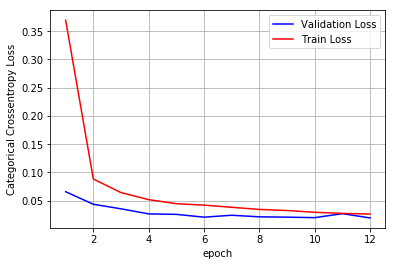

In [0]:

import matplotlib.pyplot as plt
%matplotlib inline
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#5Conv Layer Model

In [0]:
model = Sequential()
model.add(Conv2D(28, kernel_size=(3, 3),
                 activation='relu',padding = "same",
                 input_shape=input_shape))

model.add(Conv2D(32, (3, 3), activation='relu',padding = "same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))
model.add(Conv2D(12, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(0.5))
model.add(Dense(256, activation='relu'))

model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history = model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))


Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 6s 99us/step - loss: 0.3485 - acc: 0.8872 - val_loss: 0.0818 - val_acc: 0.9734
Epoch 2/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.1090 - acc: 0.9669 - val_loss: 0.0420 - val_acc: 0.9867
Epoch 3/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.0829 - acc: 0.9751 - val_loss: 0.0328 - val_acc: 0.9900
Epoch 4/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.0689 - acc: 0.9797 - val_loss: 0.0289 - val_acc: 0.9906
Epoch 5/12
60000/60000 [==============================] - 4s 70us/step - loss: 0.0607 - acc: 0.9818 - val_loss: 0.0305 - val_acc: 0.9908
Epoch 6/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.0528 - acc: 0.9848 - val_loss: 0.0245 - val_acc: 0.9922
Epoch 7/12
60000/60000 [==============================] - 4s 69us/step - loss: 0.0485 - acc: 0.9859 - val_loss: 0.0233 - val_acc

Test score: 0.01987199738456302
Test accuracy: 0.9941


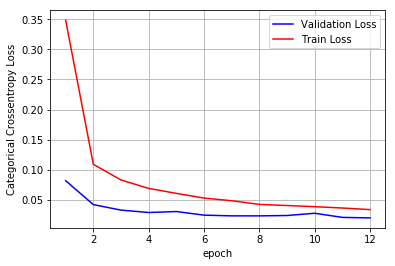

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

#7 Layer

In [0]:
from keras.layers.normalization import BatchNormalization
model = Sequential()
model.add(Conv2D(128, kernel_size=(3, 3),
                 activation='relu',padding = "same",kernel_initializer='he_normal',
                 input_shape=input_shape))

model.add(Dropout(0.25))
model.add(Conv2D(32, (2,2), activation='relu',padding = "same",kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(3, 3),padding='same'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Conv2D(64, (3, 3), activation='relu',padding = "same",kernel_initializer='he_normal'))
model.add(MaxPooling2D(pool_size=(2, 2),padding='same'))

model.add(Conv2D(256, (3, 3), activation='relu',padding = "same",kernel_initializer='he_normal'))
model.add(Conv2D(128, (2, 2), activation='relu',padding = "same",kernel_initializer='he_normal'))
model.add(Flatten())
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))

model.add(BatchNormalization())
model.add(Dense(64, activation='relu',kernel_initializer='he_normal'))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 15s 255us/step - loss: 0.2361 - acc: 0.9308 - val_loss: 0.1110 - val_acc: 0.9640
Epoch 2/12
60000/60000 [==============================] - 12s 205us/step - loss: 0.0707 - acc: 0.9779 - val_loss: 0.0567 - val_acc: 0.9820
Epoch 3/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0518 - acc: 0.9839 - val_loss: 0.0364 - val_acc: 0.9887
Epoch 4/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0448 - acc: 0.9851 - val_loss: 0.0333 - val_acc: 0.9891
Epoch 5/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0389 - acc: 0.9878 - val_loss: 0.0283 - val_acc: 0.9904
Epoch 6/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0349 - acc: 0.9890 - val_loss: 0.0304 - val_acc: 0.9903
Epoch 7/12
60000/60000 [==============================] - 12s 206us/step - loss: 0.0313 - acc: 0.9901 - val_loss: 0.

Test score: 0.02459281551934255
Test accuracy: 0.9923


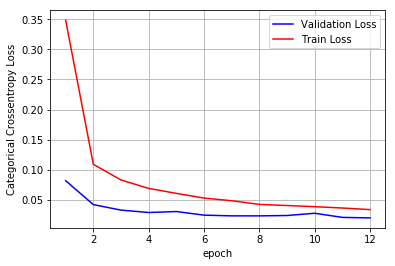

In [0]:
score = model.evaluate(x_test, y_test, verbose=0) 
print('Test score:', score[0]) 
print('Test accuracy:', score[1])
fig,ax = plt.subplots(1,1)
ax.set_xlabel('epoch') ; ax.set_ylabel('Categorical Crossentropy Loss')
x = list(range(1,epochs+1))
vy = history.history['val_loss']
ty = history.history['loss']
plt_dynamic(x, vy, ty, ax)

In [0]:
from prettytable import PrettyTable

x = PrettyTable()
x.field_names = ["CONV-Layers","Test_Accuracy","Test_Score"]
x.add_row([4,.9939,.0195])
x.add_row([5,.9941,.0198])
x.add_row([7,.9923,.0245])
print(x)

+-------------+---------------+------------+
| CONV-Layers | Test_Accuracy | Test_Score |
+-------------+---------------+------------+
|      4      |     0.9939    |   0.0195   |
|      5      |     0.9941    |   0.0198   |
|      7      |     0.9923    |   0.0245   |
+-------------+---------------+------------+
